<a href="https://colab.research.google.com/github/Mael-zys/SD212/blob/main/lab4_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SD212: Graph mining
## Lab 4: Graph clustering

In this lab, you will learn to cluster a graph and interpret the results. 

## Import

In [ ]:
!pip install scikit-network

In [ ]:
from IPython.display import SVG

In [ ]:
import numpy as np
from scipy import sparse

In [ ]:
from sknetwork.data import load_netset, grid, karate_club
from sknetwork.clustering import Louvain, BiLouvain, modularity
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.linalg import normalize
from sknetwork.utils import membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph

## Data

We will work on the following graphs (see the [NetSets](https://graphs.telecom-paristech.fr/Home_page.html#netsets-section) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [ ]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

Unpacking archive...
Parsing files...
Done.
Unpacking archive...
Parsing files...
Done.
Unpacking archive...
Parsing files...
Done.


## 1. Graphs

The Louvain algorithm aims at maximizing [modularity](https://en.wikipedia.org/wiki/Modularity_(networks)).

## Grid

Consider a grid:

In [ ]:
graph = grid(9, 9, True)
adjacency = graph.adjacency
position = graph.position

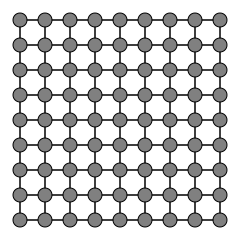

In [ ]:
image = svg_graph(adjacency, position, width=200, height=200)
SVG(image)

## To do

* Cluster the graph by Louvain and display it with the labels.
* What is the modularity?
* Try the ``shuffle_nodes`` option and observe the results.
* Find a better clustering than Louvain in terms of modularity. **Hint:** Guess and calculate!

In [ ]:
louvain = Louvain()

In [ ]:
labels = louvain.fit_transform(adjacency)

In [ ]:
print(labels)

[1 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 2 2 1 1 1 1 1 2 2 2 2 3 3 3 0 0 0 0 5 5 3
 3 3 0 0 0 0 5 5 3 3 3 0 0 0 0 5 5 3 3 3 0 0 0 0 5 5 6 6 6 6 4 4 4 4 4 6 6
 6 6 4 4 4 4 4]


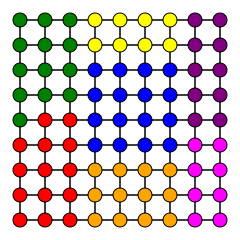

In [ ]:
image = svg_graph(adjacency, position, width=200, height=200, labels=labels)
SVG(image)

In [ ]:
modularity(adjacency, labels)

0.6220341435185185

0.6207561728395061


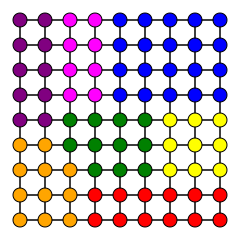

In [ ]:
louvain = Louvain(shuffle_nodes=True)
labels = louvain.fit_transform(adjacency)
print(modularity(adjacency, labels))
image = svg_graph(adjacency, position, width=200, height=200, labels=labels)
SVG(image)

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [ ]:
graph = karate_club(metadata=True)

In [ ]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

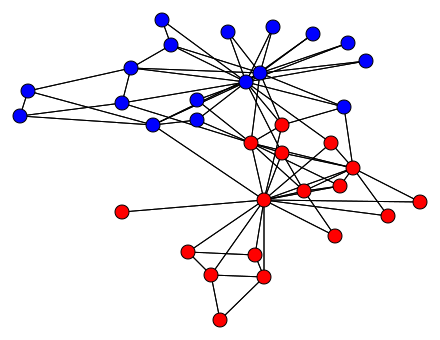

In [ ]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by Louvain and display the labels.
* What is the modularity?
* Display the aggregate graph.
* Adapt the resolution to get 2 clusters. How many nodes are misclassified?

In [ ]:
louvain = Louvain()

In [ ]:
labels = louvain.fit_transform(adjacency)

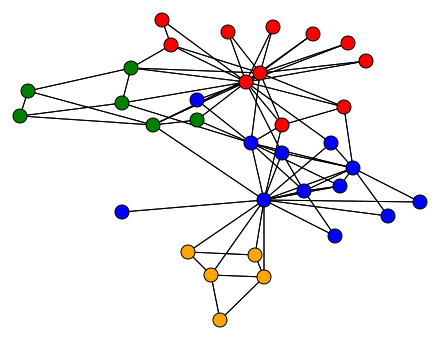

In [ ]:
image = svg_graph(adjacency, position, labels=labels)
SVG(image)

In [ ]:
adjacency_aggregate = louvain.adjacency_

In [ ]:
average_aggregate = normalize(membership_matrix(labels).T)
position_aggregate = average_aggregate.dot(position)

In [ ]:
labels_unique, counts = np.unique(labels, return_counts=True)

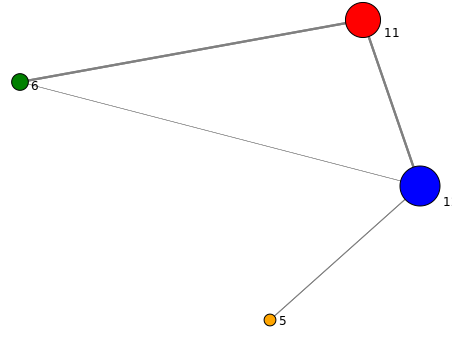

In [ ]:
image = svg_graph(adjacency_aggregate, position_aggregate, names=counts, labels=labels_unique, display_node_weight=True)
SVG(image)

0.3717948717948718


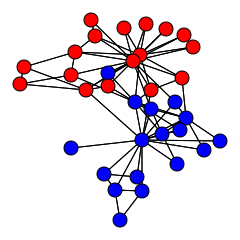

In [ ]:
louvain = Louvain(resolution=1/2)
labels = louvain.fit_transform(adjacency)
print(modularity(adjacency, labels))
image = svg_graph(adjacency, position, width=200, height=200, labels=labels)
SVG(image)

In [ ]:
print(np.sum(labels == labels_true))

2


## Openflights


In [ ]:
graph = openflights

In [ ]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

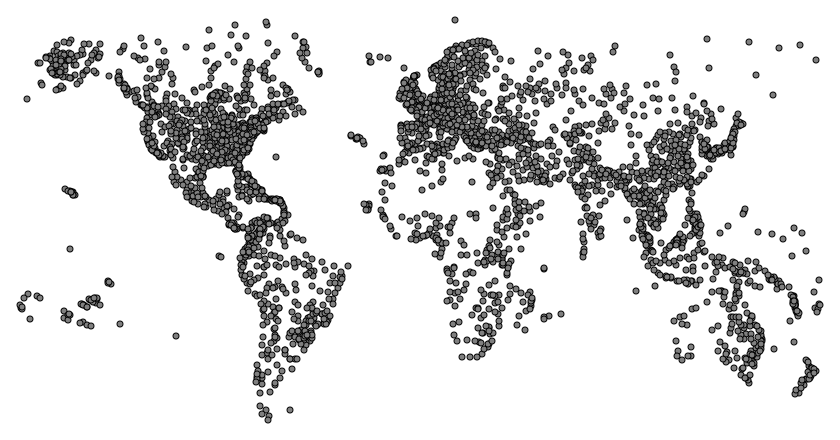

In [ ]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the clusters found by Louvain (resolution 1).
* How many clusters are there?
* What is the Simpson index of this clustering? Check the parameters of the function ``modularity``.
* How do you interpret the *inverse* of the Simpson index?
* List the top airport of each cluster in number of flights.
* Display the aggregate graph with the cluster volumes and the name of the top airport of each cluster.
* What is the strongest cluster among those having more than 100 nodes? **Hint:** Use the aggregate graph.

In [ ]:
louvain = Louvain()
labels = louvain.fit_transform(adjacency)
print(modularity(adjacency, labels))
image = svg_graph(adjacency, position, width=500, height=500, labels=labels)
SVG(image)

0.6547379865067756


In [ ]:
np.max(labels) - np.min(labels) + 1

35

In [ ]:
mod, fit, diversity = modularity(adjacency, labels, return_all=True)

In [ ]:
adjacency @ np.ones(adjacency.shape[0])

array([ 5., 10., 18., ...,  2.,  3.,  1.])

In [ ]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34])

In [ ]:
names_aggregate = []
for i in np.unique(labels):
  ind = np.argmax((adjacency @ np.ones(adjacency.shape[0])) * (labels == i))
  print(ind, names[int(ind)])
  names_aggregate.append(names[int(ind)])

1782 Hartsfield Jackson Atlanta International Airport
1618 Beijing Capital International Airport
280 Amsterdam Airport Schiphol
762 Atatürk International Airport
1171 Guarulhos - Governador André Franco Montoro International Airport
1615 Sydney Kingsford Smith International Airport
1986 Domodedovo International Airport
1833 Ted Stevens Anchorage International Airport
64 Quebec Jean Lesage International Airport
1738 Bethel Airport
330 Trondheim Airport Værnes
104 Sioux Lookout Airport
2257 Kuujjuarapik Airport
1858 Fairbanks International Airport
2019 Faa'a International Airport
78 Rankin Inlet Airport
125 Yellowknife Airport
7 Godthaab / Nuuk Airport
367 Stockholm-Bromma Airport
527 Nairobi Wilson Airport
727 João Paulo II Airport
143 Touat Cheikh Sidi Mohamed Belkebir Airport
263 Kirkwall Airport
665 Sitia Airport
1528 Myeik Airport
712 Eilat Airport
361 Vilhelmina Airport
856 Golfito Airport
229 Pori Airport
217 Ivalo Airport
2165 St. Mary's Airport
219 Jyvaskyla Airport
355 Lycksele

In [ ]:
adjacency_aggregate = louvain.adjacency_

In [ ]:
average_aggregate = normalize(membership_matrix(labels).T)
position_aggregate = average_aggregate.dot(position)

In [ ]:
labels_unique, counts = np.unique(labels, return_counts=True)

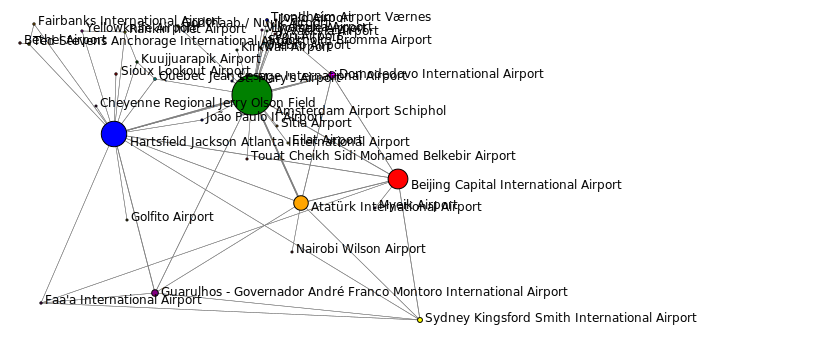

In [ ]:
image = svg_graph(adjacency_aggregate, position_aggregate, names=names_aggregate, labels=labels_unique, display_node_weight=True)
SVG(image)

In [ ]:
adjacency_aggregate.data

array([12794,   161,   697,    81,   255,    23,    36,    15,    42,
          10,    19,     1,     3,     9,     9,     6,     3,     1,
         161,  9788,   222,   279,   151,   133,     1,     1,   697,
         222, 20180,  1090,   106,   452,     3,    86,     2,    43,
          16,    12,     6,     9,     1,     2,     4,     1,     2,
           3,     1,     2,    81,   279,  1090,  5906,    13,    28,
         173,     3,   255,   106,    13,  2386,     2,     1,    23,
         151,    28,     2,  1534,     3,    36,   133,   452,   173,
        1986,     1,    15,   280,     4,     3,    42,     3,   220,
           2,     4,   164,    86,     1,   292,    10,   168,    19,
           2,   118,     2,     1,     3,   146,     3,     1,     1,
           3,   134,     9,     2,   120,     2,     9,     2,    92,
           2,   178,    43,    90,     3,    32,     6,    16,    56,
          12,    32,     6,    24,     9,    18,     1,     6,     1,
          10,     2,

In [ ]:
strengthes = louvain.adjacency_.diagonal() / (louvain.adjacency_.dot(np.ones(35,dtype=int)))

In [ ]:
print(strengthes)

[0.90321214 0.91169896 0.87968614 0.77987587 0.86355411 0.88110281
 0.71413161 0.92715232 0.82397004 0.97619048 0.77044855 0.94382022
 0.83687943 0.97333333 0.94366197 0.90225564 0.89320388 0.98888889
 0.67669173 0.91428571 0.71794872 0.72727273 0.8        0.66666667
 0.85714286 0.90909091 0.66666667 0.8        0.71428571 0.66666667
 0.83333333 0.66666667 0.8        0.66666667 0.85714286]


In [ ]:
print(names_aggregate[np.argmax(strengthes*(counts>=100))])

Beijing Capital International Airport


In [ ]:
print(names_aggregate[np.argmax(strengthes)])

Godthaab / Nuuk Airport


## 2. Directed graphs

## Wikipedia Vitals

In [ ]:
graph = wikivitals

In [ ]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by Louvain (resolution 1).
* List the top-5 pages of each cluster in terms of Personalized PageRank (with restart in the cluster).
* Display the aggregate graph with the cluster volumes and the name of the top page of each cluster.
* What is the strongest cluster? the weakest cluster?
* Do the same experiments at resolution 2.

In [ ]:
louvain = Louvain()
labels = louvain.fit_transform(adjacency)
print(modularity(adjacency, labels))

0.48073432568487523


In [ ]:
print(labels)

[5 5 5 ... 2 1 0]


In [ ]:
temp = np.where(labels==0)
print(temp[0].shape)


(1976,)


In [ ]:
names_aggregate = []
for i in np.unique(labels):
  pagerank = PageRank()
  ind = np.where(labels == i)[0]
  scores = pagerank.fit_transform(adjacency, seeds = dict(zip(ind, 1/ind.shape[0]*np.ones(ind.shape[0]))))
  top_nodes = top_k(scores, 5)
  print("cluster "+str(i)+':')
  for j, node in enumerate(top_nodes):
    print(j + 1, names[node])
  names_aggregate.append(names[top_nodes[0]])


cluster 0:
1 Taxonomy (biology)
2 Bibliothèque nationale de France
3 Animal
4 United States
5 Latin
cluster 1:
1 Bibliothèque nationale de France
2 Mathematics
3 United States
4 Physics
5 Oxygen
cluster 2:
1 Bibliothèque nationale de France
2 United States
3 Geographic coordinate system
4 France
5 United Kingdom
cluster 3:
1 Bibliothèque nationale de France
2 Latin
3 United States
4 Christianity
5 France
cluster 4:
1 Bibliothèque nationale de France
2 Geographic coordinate system
3 China
4 India
5 United States
cluster 5:
1 Bibliothèque nationale de France
2 The New York Times
3 United States
4 World War II
5 Encyclopædia Britannica
cluster 6:
1 Bibliothèque nationale de France
2 United States
3 United Kingdom
4 Latin
5 India


In [ ]:
adjacency_aggregate = louvain.adjacency_

In [ ]:
average_aggregate = normalize(membership_matrix(labels).T)

In [ ]:
labels_unique, counts = np.unique(labels, return_counts=True)

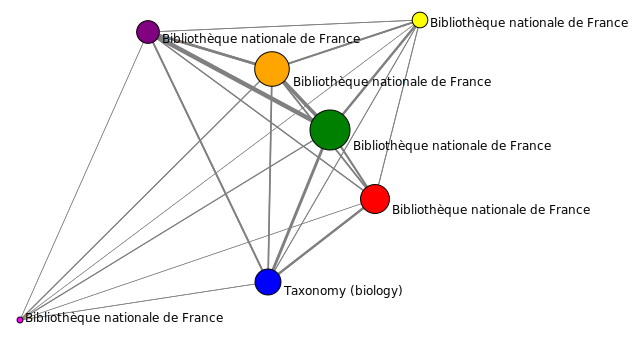

In [ ]:
image = svg_graph(adjacency_aggregate, names=names_aggregate, labels=labels_unique, display_node_weight=True)
SVG(image)

In [ ]:
strengthes = louvain.adjacency_.diagonal() / (louvain.adjacency_.dot(np.ones(7,dtype=int)))

In [ ]:
print(np.argmax(strengthes), np.argmin(strengthes))

1 6


In [ ]:
louvain = Louvain(resolution=2)
labels = louvain.fit_transform(adjacency)
print(modularity(adjacency, labels))

0.4464847407888602


In [ ]:
names_aggregate = []
for i in np.unique(labels):
  pagerank = PageRank()
  ind = np.where(labels == i)[0]
  scores = pagerank.fit_transform(adjacency, seeds = dict(zip(ind, 1/ind.shape[0]*np.ones(ind.shape[0]))))
  top_nodes = top_k(scores, 5)
  print("cluster "+str(i)+':')
  for j, node in enumerate(top_nodes):
    print(j + 1, names[node])
  names_aggregate.append(names[top_nodes[0]])


cluster 0:
1 Taxonomy (biology)
2 Animal
3 Bibliothèque nationale de France
4 Latin
5 United States
cluster 1:
1 Bibliothèque nationale de France
2 The New York Times
3 Encyclopædia Britannica
4 United States
5 France
cluster 2:
1 Bibliothèque nationale de France
2 Oxygen
3 Hydrogen
4 Electron
5 Carbon
cluster 3:
1 Bibliothèque nationale de France
2 Geographic coordinate system
3 Roman Empire
4 Ottoman Empire
5 France
cluster 4:
1 Bibliothèque nationale de France
2 United States
3 Geographic coordinate system
4 The New York Times
5 France
cluster 5:
1 Mathematics
2 Bibliothèque nationale de France
3 Real number
4 Function (mathematics)
5 Physics
cluster 6:
1 Bibliothèque nationale de France
2 The New York Times
3 World War II
4 United States
5 Soviet Union
cluster 7:
1 Geographic coordinate system
2 Bibliothèque nationale de France
3 United States
4 Atlantic Ocean
5 India
cluster 8:
1 Bibliothèque nationale de France
2 Aristotle
3 Plato
4 Augustine of Hippo
5 Thomas Aquinas
cluster 9:


In [ ]:
names_aggregate

['Taxonomy (biology)',
 'Bibliothèque nationale de France',
 'Bibliothèque nationale de France',
 'Bibliothèque nationale de France',
 'Bibliothèque nationale de France',
 'Mathematics',
 'Bibliothèque nationale de France',
 'Geographic coordinate system',
 'Bibliothèque nationale de France',
 'Bibliothèque nationale de France',
 'Earth',
 'Bibliothèque nationale de France',
 'Bibliothèque nationale de France',
 'Bibliothèque nationale de France',
 'Bibliothèque nationale de France',
 'Bibliothèque nationale de France',
 'India',
 'Bibliothèque nationale de France',
 'Bibliothèque nationale de France',
 'Color']

In [ ]:
adjacency_aggregate = louvain.adjacency_

In [ ]:
average_aggregate = normalize(membership_matrix(labels).T)

In [ ]:
labels_unique, counts = np.unique(labels, return_counts=True)

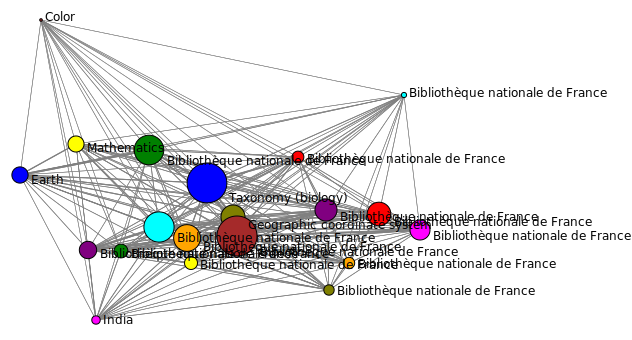

In [ ]:
image = svg_graph(adjacency_aggregate, names=names_aggregate, labels=labels_unique, display_node_weight=True)
SVG(image)

In [ ]:
strengthes = louvain.adjacency_.diagonal() / (louvain.adjacency_.dot(np.ones(np.max(labels)+1,dtype=int)))

In [ ]:
print(np.argmax(strengthes), np.argmin(strengthes))

2 19


## 3. Bipartite graphs

## Cinema

In [ ]:
graph = cinema

In [ ]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* Cluster the graph by Louvain (resolution 1). Use ``BiLouvain``.
* List the 10 largest clusters and display the names of the top-5 actors and top-5 movies of each cluster in terms of Personalized BiPageRank.

In [ ]:
louvain = BiLouvain()
labels = louvain.fit_transform(biadjacency)

In [ ]:
labels_unique, count = np.unique(labels, return_counts=True)

In [ ]:
print(count)

[17018 14442 11186  8190  7685  4789  5657  2802  2328  1071   927   954
   983   621   673   508   370   366   348   327   322   447   330   269
   351   355   232   197   180   223   185   283   144   149   143   121
   115    91    78    99    64    64    72    64    70    46    48    67
    62    54    50    35    50    39    49    87    71    54    37    41
    44    60    40    35    28    24    21    36    31    20    46    24
    22    20    27    23    18    23    19    25    20    14    14    18
    23    13    15    18    23    18    14    17    18    13    14    21
    25    16    16    11    15    13     7     8    15     6    17    17
    10    12     7    11     5     6     7     7    12     6     6     8
     6     5     6     8     7    10     8     5     7     4     8     7
     8     2     2     5     9     8     7     6     6     4     5     6
     6     5     9     6     9     4     4     4     4     4     6     5
     5     6     4     6     3     3     4     8   

In [ ]:
largest_clusters = top_k(count, 10)
largest_clusters

array([0, 1, 2, 3, 4, 6, 5, 7, 8, 9])

In [ ]:
labels_unique[:10]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
labels_col = louvain.labels_col_
_, counts_col = np.unique(labels_col, return_counts=True)
counts_col

array([10884,  4488,  2262,  3850,  4136,  3153,  1819,  1362,  1563,
         885,   737,   410,   320,   578,   482,   583,   370,   271,
         284,   294,   248,    82,   193,   229,   109,   100,   195,
         208,   208,   159,   189,    89,   223,   133,   138,    79,
          82,    88,    87,    61,    88,    81,    57,    58,    52,
          71,    69,    50,    44,    48,    51,    66,    50,    60,
          48,    10,    25,    40,    54,    46,    39,    20,    39,
          38,    42,    42,    43,    25,    29,    38,    11,    30,
          31,    32,    23,    25,    30,    25,    27,    21,    23,
          28,    28,    24,    18,    28,    26,    23,    17,    19,
          23,    20,    18,    22,    20,    11,     6,    14,    13,
          17,    12,    11,    16,    15,     6,    15,     3,     3,
          10,     8,    12,     7,    12,    11,     9,     9,     3,
           9,     9,     7,     8,     9,     8,     6,     7,     4,
           6,     8,

In [ ]:
names_aggregate = []
for i in range(10):
  pagerank = BiPageRank()
  ind = np.where(labels == i)[0]
  scores = pagerank.fit_transform(biadjacency, seeds_row = dict(zip(ind, 1/ind.shape[0]*np.ones(ind.shape[0]))))

  print("cluster "+str(i)+':')
  top_nodes = top_k(pagerank.scores_row_, 5)
  for j, node in enumerate(top_nodes):
      print(j + 1, movies[node])

  ind = np.where(labels_col == i)[0]
  scores = pagerank.fit_transform(biadjacency, seeds_col = dict(zip(ind, 1/ind.shape[0]*np.ones(ind.shape[0]))))
  top_nodes = top_k(pagerank.scores_col_, 5)
  for j, node in enumerate(top_nodes):
      print(j + 1, actors[node])

cluster 0:
1 The Walking Dead (TV series)
2 House of Cards (U.S. TV series)
3 Arrow (TV series)
4 Homeland (TV series)
5 Twin Peaks
1 Eric Roberts
2 Danny Trejo
3 Donald Sutherland
4 Harvey Keitel
5 Danny Glover
cluster 1:
1 Paramount on Parade
2 Ziegfeld Follies
3 The Crusades
4 Intolerance
5 Night Life in Hollywood
1 William Boyd
2 John Wayne
3 Lionel Barrymore
4 Roy Barcroft
5 Mickey Rooney
cluster 2:
1 Suyamvaram
2 Kerala Cafe
3 Paalayam
4 Naduvazhikal
5 Puthukkottayile Puthumanavalan
1 Mammootty
2 Jagathy Sreekumar
3 Prakash Raj
4 Prem Nazir
5 Mohanlal
cluster 3:
1 Many Kisses Later
2 Kaamelott
3 Tatort
4 Seances
5 Gramps Is in the Resistance
1 Louis de Funès
2 Gérard Depardieu
3 Totò
4 Isabelle Huppert
5 Marcello Mastroianni
cluster 4:
1 Carry On (franchise)
2 Carry On Sergeant
3 Passport to Pimlico
4 29 Acacia Avenue
5 What's Up Superdoc!
1 Christopher Lee
2 Peter Cushing
3 John Stuart
4 Sid James
5 Stewart Rome
cluster 5:
1 The Banquet (1991 film)
2 Lucky Stars
3 Seven Samurai
